In [1]:
%matplotlib inline
import plot
import market
import metrics
from decimal import Decimal
import pandas

<ipython-input-2-8bb5a2431c35>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  swrs = pandas.Series()
C:\Users\Justus\Dropbox\jupyter\prime-harvesting\plot.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_n = fig.add_subplot(111, sharex=ax, sharey=ax)


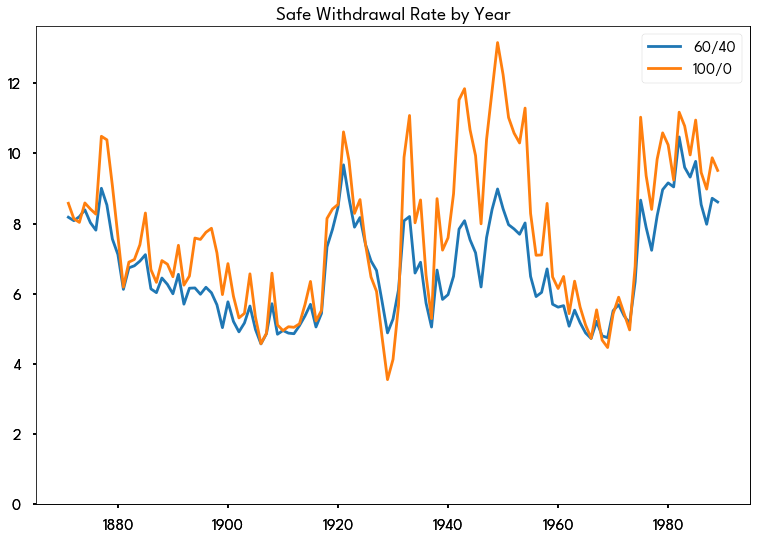

In [2]:
m = market.Returns_US_1871()
years = 30
start_year = 1871
last_year = 2018-years

def run(stock_pct):
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 2):
        returns = []
#        if start_year + _ in (1965,1966,1967,1968,1969): continue
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = ((1+annual_returns.stocks) / (1+annual_returns.inflation)) - 1
            bonds = ((1+annual_returns.bonds) / (1+annual_returns.inflation)) - 1
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
#        swr = float(metrics.ssr(returns))
        swr = float(metrics.pwa(100, 0, returns))
#        print(start_year+_, swr)
        swrs.loc[start_year+_] = swr
    return swrs


two = run(Decimal('.2'))
three = run(Decimal('.3'))
four = run(Decimal('.4'))
five = run(Decimal('.5'))
six = run(Decimal('.6'))
eight = run(Decimal('.8'))
nine = run(Decimal('.9'))
ten = run(Decimal('1'))


plot.plot_n({'60/40': six, '100/0' : ten}, '', 'Safe Withdrawal Rate by Year', add_commas=False)

#diff = filter(lambda x: x>0, [(x[0] - x[1])*100 for x in zip(eight, four)])
#plot.plot_n({'80/20 - 40/60' : list(diff)}, '', 'SWR Tell Tale Chart', add_commas=False, zero_based=False)

In [3]:
six[six.index < 1960].sort_values()

1906    4.568034
1909    4.843642
1912    4.858853
1907    4.860314
1911    4.875318
          ...   
1878    8.528281
1922    8.718867
1949    8.985446
1877    9.005623
1921    9.673947
Length: 89, dtype: float64

In [4]:
#for i in range(1, len(six)):
#    six.iloc[i] = min(six.iloc[i], six.iloc[i-1])
#plot.plot_n({'SWR' : six}, '', 'SWR over time')

In [5]:
a = ten
#print(a.sort_values()[0:10])
#print(a.median())
#print(a.quantile(.1))
six.tail()

1985    9.772970
1986    8.540734
1987    7.979977
1988    8.721127
1989    8.615022
dtype: float64

C:\Users\Justus\Dropbox\jupyter\prime-harvesting\plot.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_n = fig.add_subplot(111, sharex=ax, sharey=ax)


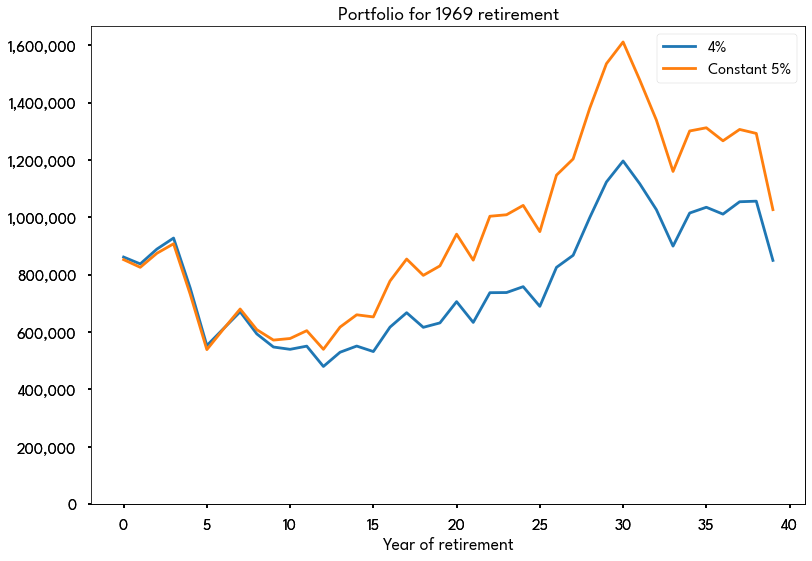

In [6]:
import itertools
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting, N_100_RebalanceHarvesting
import withdrawal
import math

def compare_em_vs_vpw(series, years=40):
    (r1, r2) = itertools.tee(series)
    portfolio = (600000, 400000)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('0.04')), portfolio=portfolio)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=lambda p, h: withdrawal.ConstantPercentage(p, h), portfolio=portfolio)

    s1 = [n.portfolio_post.value_r for n in x]
    s2 = [n.portfolio_post.value_r for n in y]

    plot.plot_n({
        '4%' : s1,
        'Constant 5%' : s2
    }, 'Year of retirement', 'Portfolio for 1969 retirement')

compare_em_vs_vpw(m.iter_from(1969), years=40)

In [7]:
m = market.Returns_US_1871()
years = 30
start_year = 1871
last_year = 2016-years

def get_stock_pct(year):
    if year < 10:
        return Decimal('.4')
    elif year < 20:
        return Decimal('.5')
    else:
        return Decimal('.6')


def run():
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 1):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stock_pct = get_stock_pct(one_year[0])
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.ssr(returns))
        swrs.loc[start_year+_] = swr
    return swrs

values = run()
values.sort_values()

<ipython-input-7-f1fae6d6f60a>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  swrs = pandas.Series()


1906    0.043673
1899    0.044463
1909    0.044673
1911    0.045646
1916    0.045656
          ...   
1981    0.090771
1984    0.091726
1983    0.092244
1985    0.093659
1982    0.102988
Length: 116, dtype: float64

In [8]:
import scipy.stats

def run():
    m = market.Returns_US_1871()
    years = 35
    start_year = 1871
    last_year = 2017-years
    stock_pct = Decimal('.6')

    swrs = pandas.Series()
    for _ in range(last_year - start_year + 1):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stock_pct = stock_pct
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.ssr(returns))
        swrs.loc[start_year+_] = swr
    return swrs

values = run()

scipy.stats.percentileofscore(values, .04)

<ipython-input-8-cdcc15da1915>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  swrs = pandas.Series()


0.0

In [9]:
m = market.Returns_US_1871()
years = 30
start_year = 1871
last_year = 2016-years

def get_stock_pct(stocks, bonds):
    if stocks < bonds:
        return Decimal('.4')
    else:
        return Decimal('.6')

def run():
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 1):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            stock_pct = get_stock_pct(stocks, bonds)
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.ssr(returns))
        swrs.loc[start_year+_] = swr
    return swrs

run().sort_values()

<ipython-input-9-e7f56e86d723>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  swrs = pandas.Series()


1906    0.052049
1909    0.053159
1911    0.053603
1912    0.053923
1910    0.054718
          ...   
1922    0.101713
1983    0.103647
1985    0.105451
1921    0.109745
1982    0.114363
Length: 116, dtype: float64

In [10]:
print(six[1966])

4.722701750005229


In [11]:
class BondsSuck(market.Returns_US_1871):
    def __init__(self):
        self.start_year = 1871
        self.dataframe = pandas.read_csv('1871_returns.csv')
        # make bonds have a 0% real return
        self.dataframe['IT Bonds'] = self.dataframe['CPI-U']
        self.years_of_data = len(self.dataframe)

In [12]:
hist_swrs = six
hist_swrs.head()

1871    8.180166
1872    8.082159
1873    8.196108
1874    8.391998
1875    8.025499
dtype: float64

In [13]:
m = BondsSuck()
years = 30
start_year = 1871
last_year = 2018-years

def run(stock_pct):
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 2):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = ((1+annual_returns.stocks) / (1+annual_returns.inflation)) - 1
            bonds = ((1+annual_returns.bonds) / (1+annual_returns.inflation)) - 1
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.pwa(100, 0, returns))
        swrs.loc[start_year+_] = swr
    return swrs

In [14]:
badbonds_swrs = run(Decimal('.6'))

<ipython-input-13-21089c1f4eed>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  swrs = pandas.Series()


<AxesSubplot:title={'center':'Historical bond returns vs. 0% real bond returns'}>

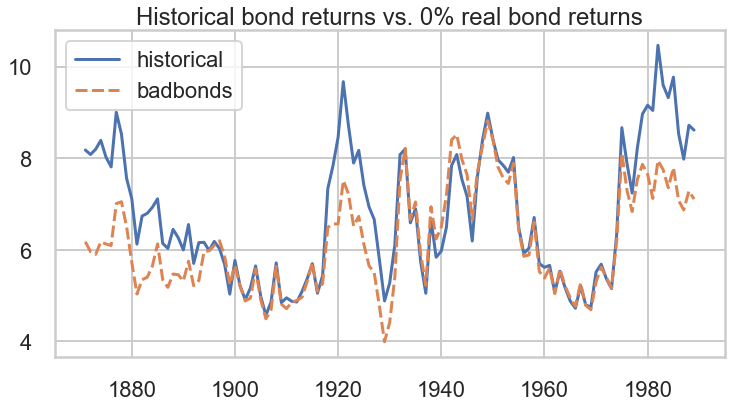

In [15]:
%matplotlib inline
#%pdb on
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')
plt.figure(figsize=(12,6))
plt.title('Historical bond returns vs. 0% real bond returns')
seaborn.lineplot(data=pandas.DataFrame({'historical': hist_swrs, 'badbonds' : badbonds_swrs}))

In [16]:
hist_swrs.loc[1970]

5.513360777320095